In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

In [70]:
# Evitar warnings molestos
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [71]:
df = pd.read_csv(
    'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv'
)

In [72]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


In [73]:
X = df['canonical_smiles']
y = df['pIC50']

In [74]:
# df = df[~(
#         (df.pIC50 > df.pIC50.quantile(.975)) | 
#         (df.pIC50 < df.pIC50.quantile(.025))
# )]  # Elimino outliers
# 
# sns.histplot(data=df, x="pIC50")

# Modelo Recurrentes con Embeddings a nivel de caracter

## Canonical_smiles To secuence

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tk.texts_to_sequencesUtilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [76]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

max_len = len(df.iloc[max_len_idx].canonical_smiles)

### Tokenizer 1

In [77]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [78]:
# Basic tokenizer, at char level
tk = Tokenizer(
    lower=False,
    char_level=True,
)
tk.fit_on_texts(X)
# tk.word_index

In [79]:
X_seq = tk.texts_to_sequences(X)
X_seq_pad = pad_sequences(
    X_seq,
    maxlen = max_len,
    padding='pre'
)

In [80]:
example = "NC(=O)O"
pad_sequences(tk.texts_to_sequences([example]), maxlen = max_len)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 8, 2, 3, 9, 6, 4, 6]], dtype=int32)

## Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_seq_pad, 
    y, 
    test_size=0.2, 
    random_state=88
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    random_state=88
)

len(X_train), len(X_val), len(X_test)

(3726, 932, 1165)

In [82]:
# # Elimino outliers (5%) -> No ayuda
# 
# top_cut_value = y_train.quantile(.975)
# bottom_cut_value = y_train.quantile(.025)
# 
# _ = [el for el in zip(y_train, X_train) if el[0] > bottom_cut_value and el[0] < top_cut_value]
# 
# y_train = pd.Series([el[0] for el in _])
# X_train = np.array([(el[1]) for el in _])

In [83]:
# Normalización -> No ayuda
# y_train_mean = y_train.mean()
# y_train_std = y_train.std()
# 
# y_train = (y_train - y_train_mean) / y_train_std
# y_test = (y_test - y_train_mean) / y_train_std

In [84]:
# sns.histplot(data=np.log(y_train))
# sns.histplot(data=y_train)

## Network Model

In [85]:
# %load_ext tensorboard

In [86]:
# Imports
from datetime import datetime as dt

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam
from tensorflow.keras import backend as K

In [87]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def calculate_r2(y_true, y_pred, _round=8):
    return round(1 - ((y_true.values - y_pred.reshape(-1)) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum(), _round)

In [88]:
# ModelCheckpoint
mcp = ModelCheckpoint(
    'models/best_model_{epoch}', 
    save_best_only=True, 
    save_format="h5",
)

In [89]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,                  # number of epochs with no improvement (0 means the training 
                                  # is terminated as soon as the performance measure gets worse 
                                  # from one epoch to the next)
    restore_best_weights=True
)

In [90]:
# Tensorboard
tensorboard = TensorBoard(
    log_dir="logs/fit/model-default",
    histogram_freq=1,
    write_graph=False,
    write_images=False
)

In [91]:
# Constantes
vocab_size = len(tk.word_index)
print(f"vocab_size: {vocab_size}, max_sequence_len: {max_len}")

vocab_size: 38, max_sequence_len: 207


## Armar modelo en keras de LSTM

In [92]:
from models import create_model

model = create_model(vocab_size, max_len)

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 64)           2496      
                                                                 
 bidirectional_4 (Bidirectio  (None, 207, 256)         148992    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              296448    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [94]:
model.compile(
    optimizer=Nadam(
        learning_rate=0.001
    ),  # RMSprop, Adam, Nadam
    loss="mse",
    metrics=[R2]
)

In [95]:
## Tensorboard
from tensorboard import notebook
notebook.list() 

# %tensorboard --logdir logs/fit/
# !tensorboard --logdir logs/fit/ -> Run in your cli (with poetry)

Known TensorBoard instances:
  - port 6006: logdir logs/fit/ (started 1 day, 4:47:46 ago; pid 2193)


In [96]:
model_name = "model"
tensorboard.log_dir = f"logs/fit/model-{model_name}-{dt.now().strftime('%Y%m%dT%H%M')}"

EPOCHS = 500  # La idea es que se detenga por el earlyStopping

history = model.fit(
    X_train, 
    y_train, 
    epochs=EPOCHS, 
    batch_size=128, 
    validation_data=(X_val, y_val), 
    callbacks=[
        # mcp,
        early_stopping,
        tensorboard
    ]
)

Epoch 1/500
30/30 [==============================] - 50s 1s/step - loss: 34.6013 - R2: -12.9004 - val_loss: 33.9951 - val_R2: -11.2648
Epoch 2/500
30/30 [==============================] - 40s 1s/step - loss: 23.3554 - R2: -8.2287 - val_loss: 30.9492 - val_R2: -10.1661
Epoch 3/500
30/30 [==============================] - 45s 1s/step - loss: 14.8446 - R2: -4.9045 - val_loss: 26.4158 - val_R2: -8.5295
Epoch 4/500
30/30 [==============================] - 42s 1s/step - loss: 9.9432 - R2: -2.9007 - val_loss: 20.3548 - val_R2: -6.3407
Epoch 5/500
30/30 [==============================] - 42s 1s/step - loss: 6.7524 - R2: -1.7787 - val_loss: 15.0959 - val_R2: -4.4411
Epoch 6/500
30/30 [==============================] - 45s 1s/step - loss: 4.8467 - R2: -0.8929 - val_loss: 10.8271 - val_R2: -2.8981
Epoch 7/500
30/30 [==============================] - 41s 1s/step - loss: 3.5680 - R2: -0.4052 - val_loss: 7.5534 - val_R2: -1.7140
Epoch 8/500
30/30 [==============================] - 43s 1s/step - loss

In [97]:
y_pred = model.predict(X_test)  # 120 epochs

37/37 [==============================] - 7s 133ms/step


In [98]:
# Score
print(f"R2: {calculate_r2(y_test, y_pred, 3)}; ref value: 0.498")
# 

R2: 0.564; ref value: 0.498


## Load model (solo si se grabo el modelo)

In [99]:
# from tensorflow.keras.models import load_model
# 
# # model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})
# y_pred = model_loaded.predict(X_test)
# r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
# 
# r2
# print(f"R2: {round(r2, 3)}; ref value: 0.498")

## Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

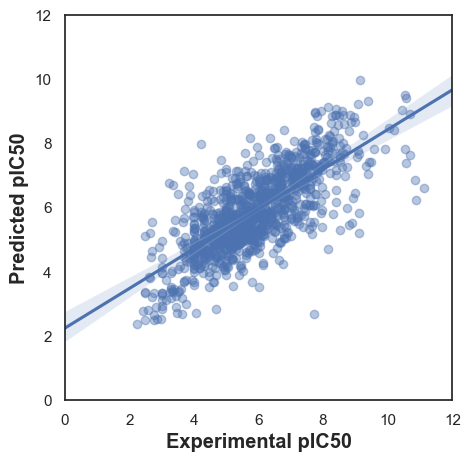

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show